In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform

# Exercise 1 : Linear SVM - Influence of parameter C

In [2]:
dataset = pd.read_csv('LineaireNoisy2.csv', delimiter=';')
dataset

,x1,x2,y
0,10.00,5.00,1
1,9.50,10.00,-1
2,2.30,5.25,-1
3,3.40,3.88,-1
4,7.66,4.46,-1
...,...,...,...
147,15.01,15.67,1
148,16.05,14.70,1
149,15.65,18.23,1
150,18.85,17.43,1


In [3]:
dataset.y.value_counts()

 1    76
-1    76
Name: y, dtype: int64

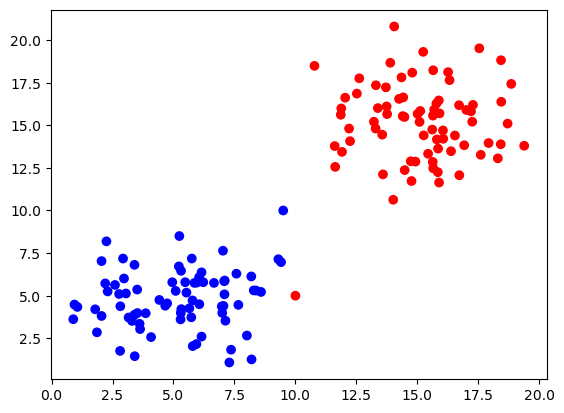

In [6]:
plt.scatter(dataset['x1'], dataset['x2'], c=['red' if x==1 else 'blue' for x in dataset['y']])#, label='Trainning data', marker='x')

## Fitting a linear SVM to this dataset

In [7]:
from sklearn import svm

In [9]:
model_svm = svm.SVC(C = 1000, kernel = 'linear')
# here SVC stands for Support Vector Classification (there are other kinds of SVM),and we ask for a linear kernel
# The parameter C is set to 1000

In [11]:
model_svm.fit(dataset.iloc[:,:-1], dataset.y)
# here we ask to fit the model using the features (x1 and x2) and the target (y)

SVC(C=1000, kernel='linear')

In [12]:
model_svm.support_vectors_
# the support vectors found by the SVC. Here 3 support vectors, called sv1, sv2 and sv3

array([[ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

In [13]:
model_svm.support_
# the index of the support vectors in the dataset. you can check 

array([ 61,   0, 102], dtype=int32)

In [14]:
model_svm.dual_coef_
# the lagrange coefficients associated to the support vectors (w1, w2 and w3)

array([[-4.04838982,  3.46935572,  0.5790341 ]])

In [15]:
model_svm.intercept_
# the constant of the model (w0)

array([-26.58177221])

In [19]:
model_svm.decision_function(dataset.iloc[:,0:2])

array([  0.99940407,  -1.24148389, -20.91114918, -17.56203656,
        -5.55801067, -10.10889154,  -3.90822106, -21.76685665,
       -10.39666304, -18.76130279, -13.09448448, -15.41565599,
       -22.18728362,  -3.62255982, -16.27032034, -17.78695937,
        -7.43350422, -17.49256868, -17.13473082,  -7.38326661,
       -19.5516331 , -12.85908729, -16.87859157, -18.21741848,
        -4.32685023, -10.06558557,  -6.0540296 , -12.56078853,
       -12.99192542, -11.72582313,  -7.3553862 , -12.18372041,
        -7.47457014, -24.64741494, -10.16024918, -18.04301931,
       -14.80785344, -21.27232307,  -1.34003152, -17.23762877,
        -7.28068112, -13.86615894, -19.43865014, -10.60139177,
        -7.27870065, -10.47191611,  -5.97833429, -10.88212828,
        -3.49899913, -12.14974236,  -4.26845759, -20.12147022,
       -11.9679693 , -11.42929574, -14.07039256, -24.64824895,
        -6.91064799, -19.1329775 , -16.77089868,  -8.609971  ,
        -9.54137378,  -0.99970304, -10.91975481,  -7.86

In [22]:
dataset.iloc[0:2,:]

,x1,x2,y
0,10.0,5.0,1
1,9.5,10.0,-1


In [24]:
model_svm.predict(dataset.iloc[0:2,:-1])

array([ 1, -1])

In [26]:
model_svm.support_vectors_

array([[ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

In [28]:
model_svm.predict(model_svm.support_vectors_)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([-1,  1,  1])

In [29]:
model_svm.score(dataset.iloc[:,:-1],dataset.y)

1.0

In [30]:
def svm_draw(model_svm, xmin, xmax, dataset):
    
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))


    plt.figure(figsize=(10, 8))
    # Plotting our two-features-space
    plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.y, cmap = color_map, marker='+')
    # Constructing a hyperplane using a formula.
    w = model_svm.coef_[0]           # w consists of 2 elements
    b = model_svm.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(xmin, xmax)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

    plt.plot(x_points, y_points, c='g');

    plt.scatter(model_svm.support_vectors_[:, 0],
                model_svm.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=1);

    # Step 2 (unit-vector):
    w_hat = model_svm.coef_[0] / (np.sqrt(np.sum(model_svm.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(model_svm.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
             points_of_line_above[:, 1], 
             'g--', 
             linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
             points_of_line_below[:, 1], 
             'g--',
             linewidth=2)

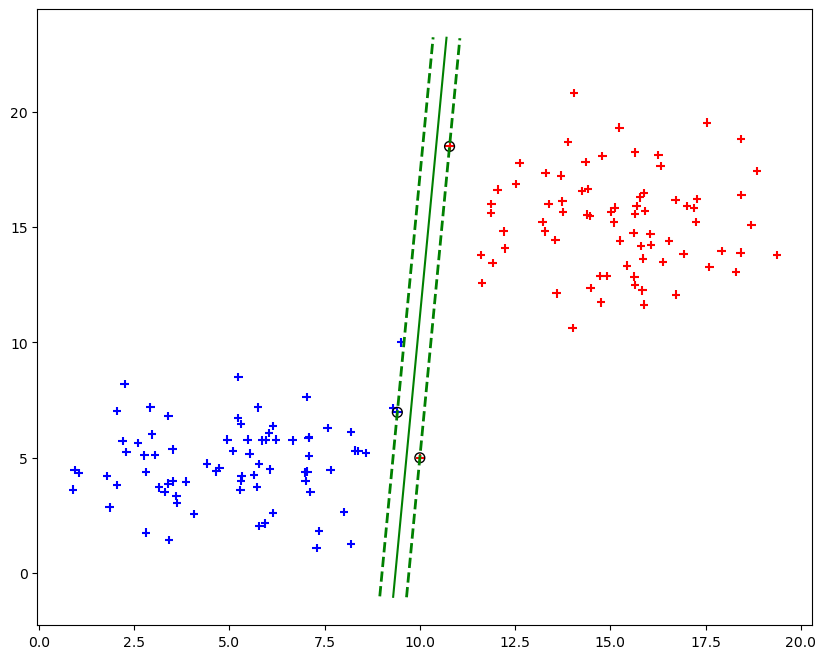

In [31]:
svm_draw(model_svm, 9.3, 10.7, dataset)

In [34]:
model_svm_c1 = svm.SVC(C = 1, kernel = 'linear').fit(dataset.iloc[:,:-1], dataset.y)

In [35]:
model_svm_c1.support_vectors_

array([[ 9.5 , 10.  ],
       [ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

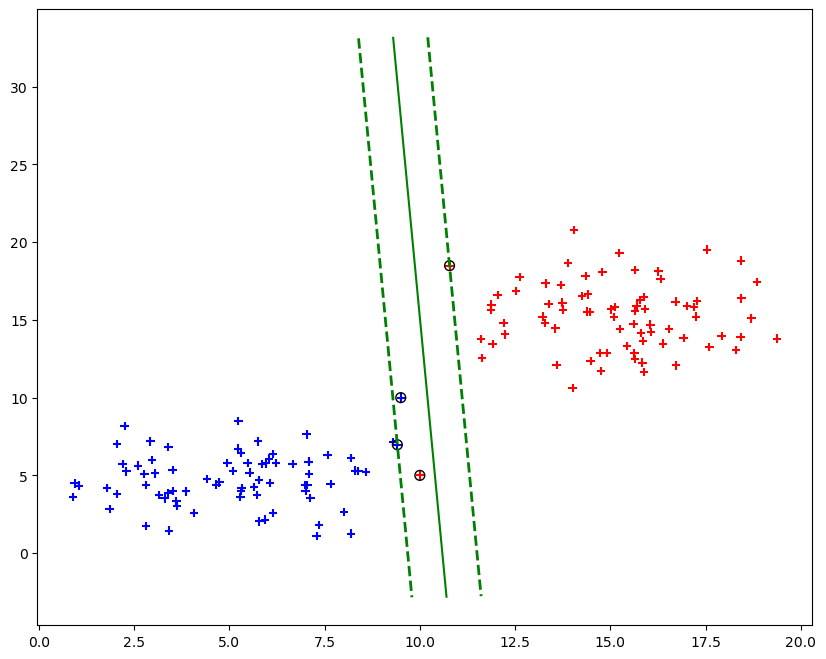

In [36]:
svm_draw(model_svm_c1, 9.3, 10.7, dataset)

In [37]:
model_svm_c1.predict(model_svm_c1.support_vectors_)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([-1, -1, -1,  1])

In [38]:
model_svm_c2 = svm.SVC(C = 0.01, kernel = 'linear').fit(dataset.iloc[:,:-1], dataset.y)

In [40]:
model_svm_c2.support_vectors_

array([[ 9.5 , 10.  ],
       [ 5.24,  8.5 ],
       [ 8.19,  6.13],
       [ 9.3 ,  7.14],
       [ 9.41,  6.97],
       [ 7.03,  7.64],
       [10.  ,  5.  ],
       [11.61, 13.78],
       [14.01, 10.63],
       [11.91, 13.44],
       [11.63, 12.56],
       [13.59, 12.12]])

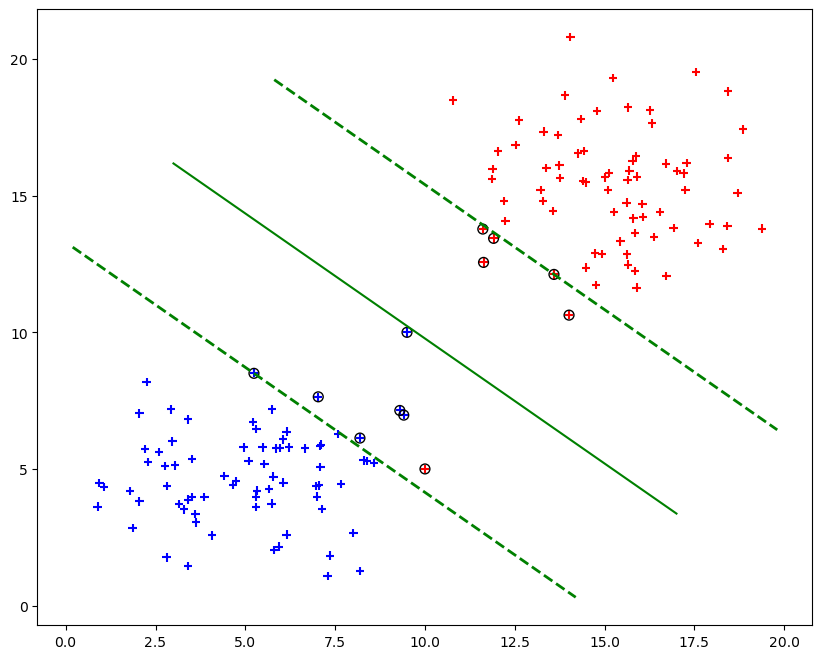

In [41]:
svm_draw(model_svm_c2, 3, 17, dataset)

# Exercise 2: Choosing C using train/val/test split

In [42]:
# Load the dataset
dataset = pd.read_csv("spam7.csv", decimal=",", index_col=0, delimiter = ";")
dataset
# A description about this dataset is given here:
# http://math.furman.edu/~dcs/courses/math47/R/library/DAAG/html/spam7.html

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [43]:
dataset.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


In [44]:
dataset.yesno.value_counts()

n    2788
y    1813
Name: yesno, dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler
# First, get the features
X = dataset.iloc[:,0:6]
# then create a scaler on X
scaler = StandardScaler().fit(X)
# Apply it to X
X = scaler.transform(X)
# create a dataframe with X
X = pd.DataFrame(X, columns=dataset.columns[0:6])
X
# You should see that the features have been transformed
print(X.dollar.mean())
# the mean of feature 'dollar' is now 0 (very close to 0)
# it is the same for the other features

-2.470915838331146e-17


In [48]:
# Now we will add the target variable inside X
X['yesno'] = dataset.yesno
X
# now our dataset is called X

,crl.tot,dollar,bang,money,n000,make,yesno
0,-0.008724,-0.308355,0.624007,-0.212994,-0.290209,-0.342434,y
1,1.228324,0.423783,0.126203,0.758565,0.937491,0.345359,y
2,3.258733,0.440053,0.008496,-0.077428,3.021726,-0.145921,y
3,-0.152222,-0.308355,-0.161934,-0.212994,-0.290209,-0.342434,y
4,-0.152222,-0.308355,-0.164387,-0.212994,-0.290209,-0.342434,y
...,...,...,...,...,...,...,...
4596,-0.322110,-0.308355,-0.329912,-0.212994,-0.290209,0.672880,n
4597,-0.444165,-0.308355,0.102907,-0.212994,-0.290209,-0.342434,n
4598,-0.272628,-0.308355,-0.329912,-0.212994,-0.290209,0.640128,n
4599,-0.338604,-0.308355,-0.329912,-0.212994,-0.290209,2.801763,n


In [49]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [53]:
model_svm = svm.SVC(C = 1, kernel = 'linear').fit(data_train.iloc[:,:-1], data_train.yesno)

In [54]:
model_svm_c2.support_vectors_

array([[ 9.5 , 10.  ],
       [ 5.24,  8.5 ],
       [ 8.19,  6.13],
       [ 9.3 ,  7.14],
       [ 9.41,  6.97],
       [ 7.03,  7.64],
       [10.  ,  5.  ],
       [11.61, 13.78],
       [14.01, 10.63],
       [11.91, 13.44],
       [11.63, 12.56],
       [13.59, 12.12]])

In [55]:
model_svm.score(data_train.iloc[:,:-1], data_train.yesno)

0.8453416149068324

In [56]:
model_svm.score(data_valid.iloc[:,:-1], data_valid.yesno)

0.8463768115942029

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
y_pred = model_svm.predict(data_train.iloc[:,:-1])
y_pred

array(['y', 'n', 'n', ..., 'n', 'y', 'n'], dtype=object)

In [64]:
tn, fp, fn, tp = confusion_matrix(y_true=data_train.yesno,y_pred=y_pred).ravel()

In [65]:
(tn, fp, fn, tp)

(1828, 111, 387, 894)

In [ ]:
pruned_models = []
pred_scores = []
val_scores = []
for n_estimator in np.arange(0.01,1000,100):
    svm_pruned = svm.SVC(C = n_estimator, kernel = 'linear').fit(data_train.iloc[:,:-1], data_train.yesno)
    p_score = svm_pruned.score(data_train.iloc[:,:-1],data_train.yesno)
    v_score = svm_pruned.score(data_valid.iloc[:,:-1],data_valid.yesno)
    pred_scores.append(p_score)
    val_scores.append(v_score)
    pruned_models.append(svm_pruned)

In [ ]:
parameters = np.arange(0.01,1000,100)
plt.figure(figsize=(10, 6))
plt.plot(parameters, pred_scores,color='red',label='Prediction Score')
plt.plot(parameters,val_scores,color='blue',label='Validation Score')
plt.xlabel("estimator")
plt.ylabel("prediction and validation scores")
plt.legend()
plt.show()

In [82]:
for n_estimator in np.arange(0.01,1000,100):
    print(n_estimator)

0.01
100.01
200.01
300.01
400.01
500.01
600.01
700.01
800.01
900.01


# Exercise 3: Non-linear SVM

In [83]:
# Load a dataset
dataset = pd.read_csv("SepNonLineaire.csv")
dataset


,x1,x2,y
0,1.5,4.0,1
1,1.0,2.0,1
2,0.0,0.0,1
3,1.0,4.0,1
4,0.5,3.0,1
...,...,...,...
145,-2.8,-3.3,0
146,-2.8,1.0,0
147,-2.8,3.0,0
148,-2.4,3.0,0


In [85]:
dataset.describe()

,x1,x2,y
count,150.000000,150.000000,150.000000
mean,0.552000,0.870667,0.300000
std,1.923738,3.842845,0.459793
min,-2.800000,-5.000000,0.000000
25%,-1.000000,-3.000000,0.000000
50%,0.600000,1.000000,0.000000
75%,2.375000,4.000000,1.000000
max,4.000000,8.200000,1.000000


In [86]:
dataset.y.value_counts()

0    105
1     45
Name: y, dtype: int64

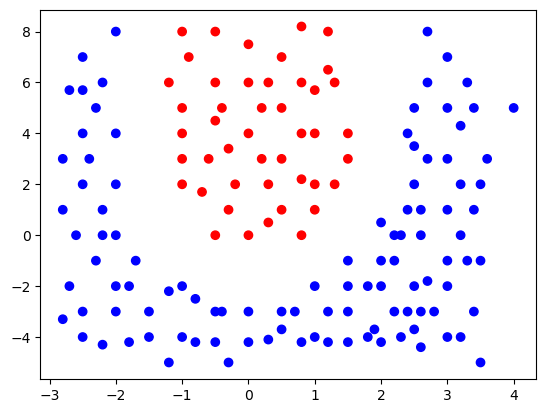

In [87]:
plt.scatter(dataset['x1'], dataset['x2'], c=['red' if x==1 else 'blue' for x in dataset['y']])

In [88]:
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [89]:
nl_svm_model = svm.SVC(C = n_estimator, kernel = 'rbf', gamma=10).fit(data_train.iloc[:,:-1], data_train.y)

In [90]:
nl_svm_model.score(data_train.iloc[:,:-1], data_train.y)

1.0

In [91]:
nl_svm_model.score(data_valid.iloc[:,:-1], data_valid.y)

0.7727272727272727

In [92]:
def draw_boundary(model, data, x_min, x_max, y_min, y_max):
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)
    

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


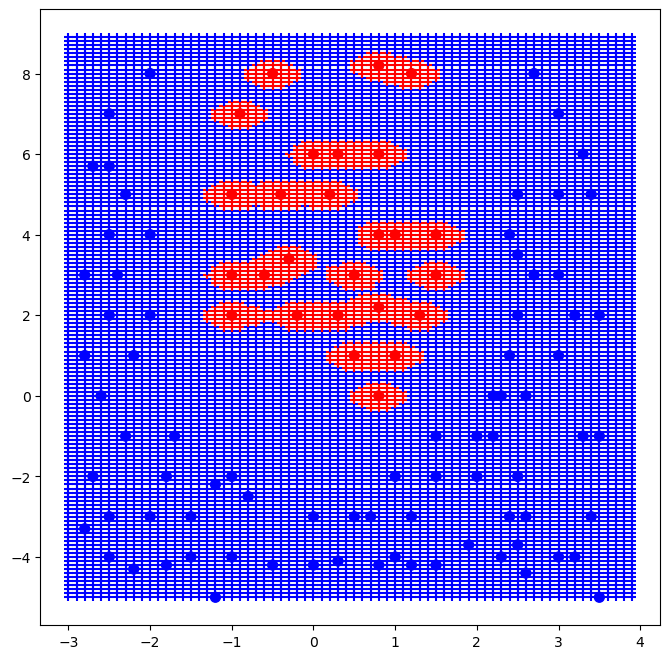

In [93]:
draw_boundary(nl_svm_model, data_train, -3,4,-5,9)

In [112]:
pruned_models = []
pred_scores = []
val_scores = []
for n_estimator in np.arange(0.01,300,5):
    for g in np.arange(10,400,5):
        svm_pruned = svm.SVC(C = n_estimator, kernel = 'linear',gamma=g).fit(data_train.iloc[:,:-1], data_train.y)
        p_score = svm_pruned.score(data_train.iloc[:,:-1],data_train.y)
        v_score = svm_pruned.score(data_valid.iloc[:,:-1],data_valid.y)
        pred_scores.append(p_score)
        val_scores.append(v_score)
        pruned_models.append(svm_pruned)

In [113]:
best_estimator = val_scores.index(max(val_scores))
best_estimator

0

In [114]:
best_svm = pruned_models[best_estimator]
best_svm

SVC(C=0.01, gamma=10, kernel='linear')

In [115]:
best_svm.score(data_test.iloc[:,:-1], data_test.y)

0.43478260869565216

In [116]:
svm_poly = svm.SVC(C = n_estimator, kernel = 'poly',degree=1).fit(data_train.iloc[:,:-1], data_train.y)

In [117]:
svm_poly.score(data_train.iloc[:,:-1],data_train.y)

0.7523809523809524

In [118]:
pruned_models = []
pred_scores = []
val_scores = []
for degree in range(1,20):
    dt_pruned = svm.SVC(C = n_estimator, kernel = 'poly',degree=degree).fit(data_train.iloc[:,:-1], data_train.y)
    p_score = dt_pruned.score(data_train.iloc[:,:-1], data_train.y)
    v_score = dt_pruned.score(data_valid.iloc[:,:-1], data_valid.y)
    pred_scores.append(p_score)
    val_scores.append(v_score)
    pruned_models.append(dt_pruned)

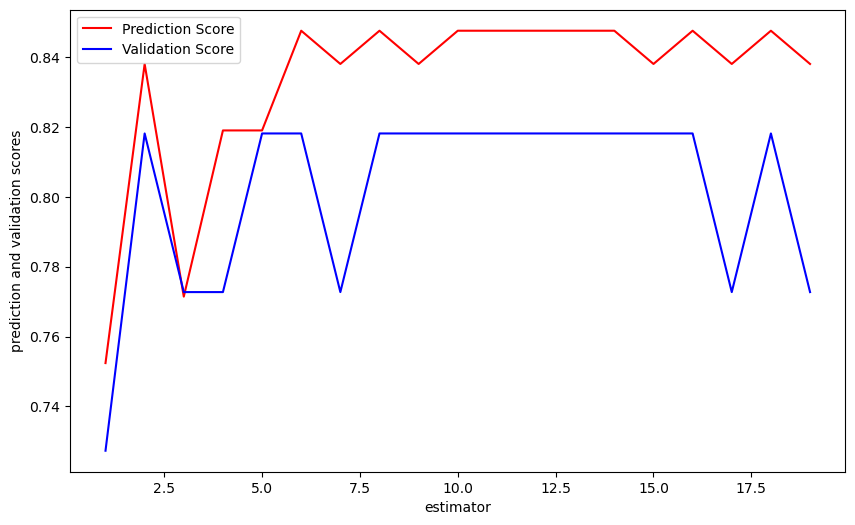

In [119]:
parameters = range(1,20)
plt.figure(figsize=(10, 6))
plt.plot(parameters, pred_scores,color='red',label='Prediction Score')
plt.plot(parameters,val_scores,color='blue',label='Validation Score')
plt.xlabel("estimator")
plt.ylabel("prediction and validation scores")
plt.legend()
plt.show()

In [120]:
best_estimator = val_scores.index(max(val_scores))
best_estimator

1

In [121]:
best_p_svm = pruned_models[best_estimator]
best_p_svm

SVC(C=295.01, degree=2, kernel='poly')

In [122]:
best_p_svm.score(data_test.iloc[:,:-1], data_test.y)

0.8695652173913043